# HR Analytics Project
 
### Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,KFold,validation_curve

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\user\Desktop\internship\data\DSData-master\HR_attrition_rate.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(11991, 10)

As we see after dropping duplicates we left with only 11991 rows which is 3008 rows less than orignal data. Now we will further move to check any null values in data.

In [7]:
df.isnull().sum().sum()   # There is no null values in data

0

In [8]:
df['salary'].unique

<bound method Series.unique of 0           low
1        medium
2        medium
3           low
4           low
          ...  
11995      high
11996      high
11997      high
11998      high
11999       low
Name: salary, Length: 11991, dtype: object>

Now we will replace salary value [low,medium,high] with [0,1,2]

In [9]:
# Define a mapping dictionary for the replacements
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Replace the values in the 'salary' column using the mapping dictionary
df['salary'] = df['salary'].map(salary_mapping)

# Print the modified DataFrame
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,2
11996,0.74,0.95,5,266,10,0,0,1,management,2
11997,0.85,0.54,3,185,10,0,0,1,management,2
11998,0.33,0.65,3,172,10,0,0,1,marketing,2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0
salary,11991.0,0.603870,0.635900,0.00,0.00,1.00,1.00,2.0


In [16]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.000502
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000551
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.038164
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.000058
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.118882
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.087851
salary,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,1.000000


In [17]:
df.corr()['salary'].sort_values()

left                    -0.118882
last_evaluation         -0.015775
average_montly_hours    -0.000551
number_project          -0.000502
Work_accident           -0.000058
satisfaction_level       0.029241
time_spend_company       0.038164
promotion_last_5years    0.087851
salary                   1.000000
Name: salary, dtype: float64

In [22]:
df.skew().sort_values()

satisfaction_level      -0.538702
last_evaluation         -0.031686
average_montly_hours     0.027208
number_project           0.332152
salary                   0.570024
left                     1.795135
time_spend_company       1.816577
Work_accident            1.914410
promotion_last_5years    7.490008
dtype: float64

## Visualization of data

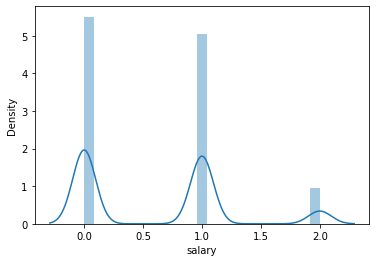

In [11]:
sns.distplot(df['salary'])
plt.show()

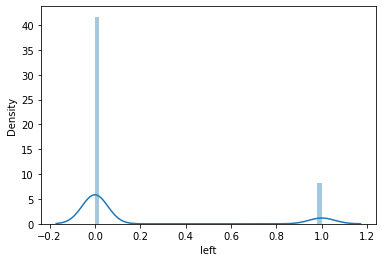

In [32]:
sns.distplot(df['left'])
plt.show()

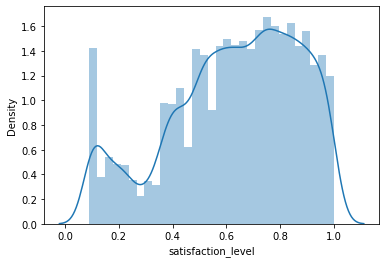

In [33]:
sns.distplot(df['satisfaction_level'])
plt.show()

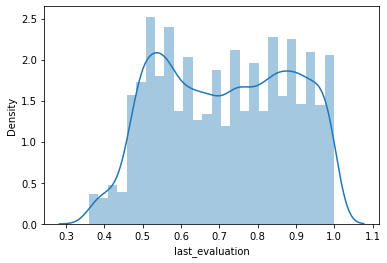

In [34]:
sns.distplot(df['last_evaluation'])
plt.show()

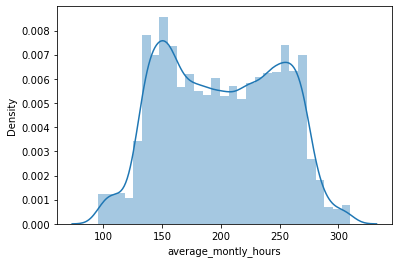

In [35]:
sns.distplot(df['average_montly_hours'])
plt.show()

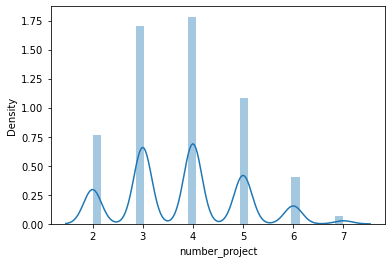

In [36]:
sns.distplot(df['number_project'])
plt.show()

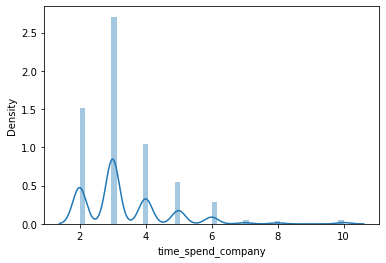

In [37]:
sns.distplot(df['time_spend_company'])
plt.show()

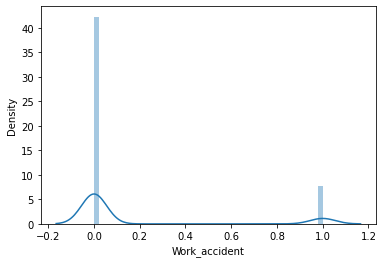

In [38]:
sns.distplot(df['Work_accident'])
plt.show()

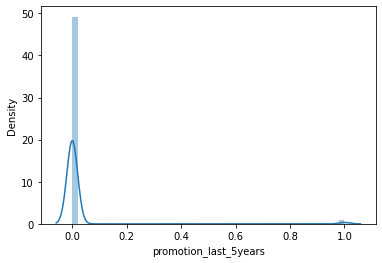

In [39]:
sns.distplot(df['promotion_last_5years'])
plt.show()

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

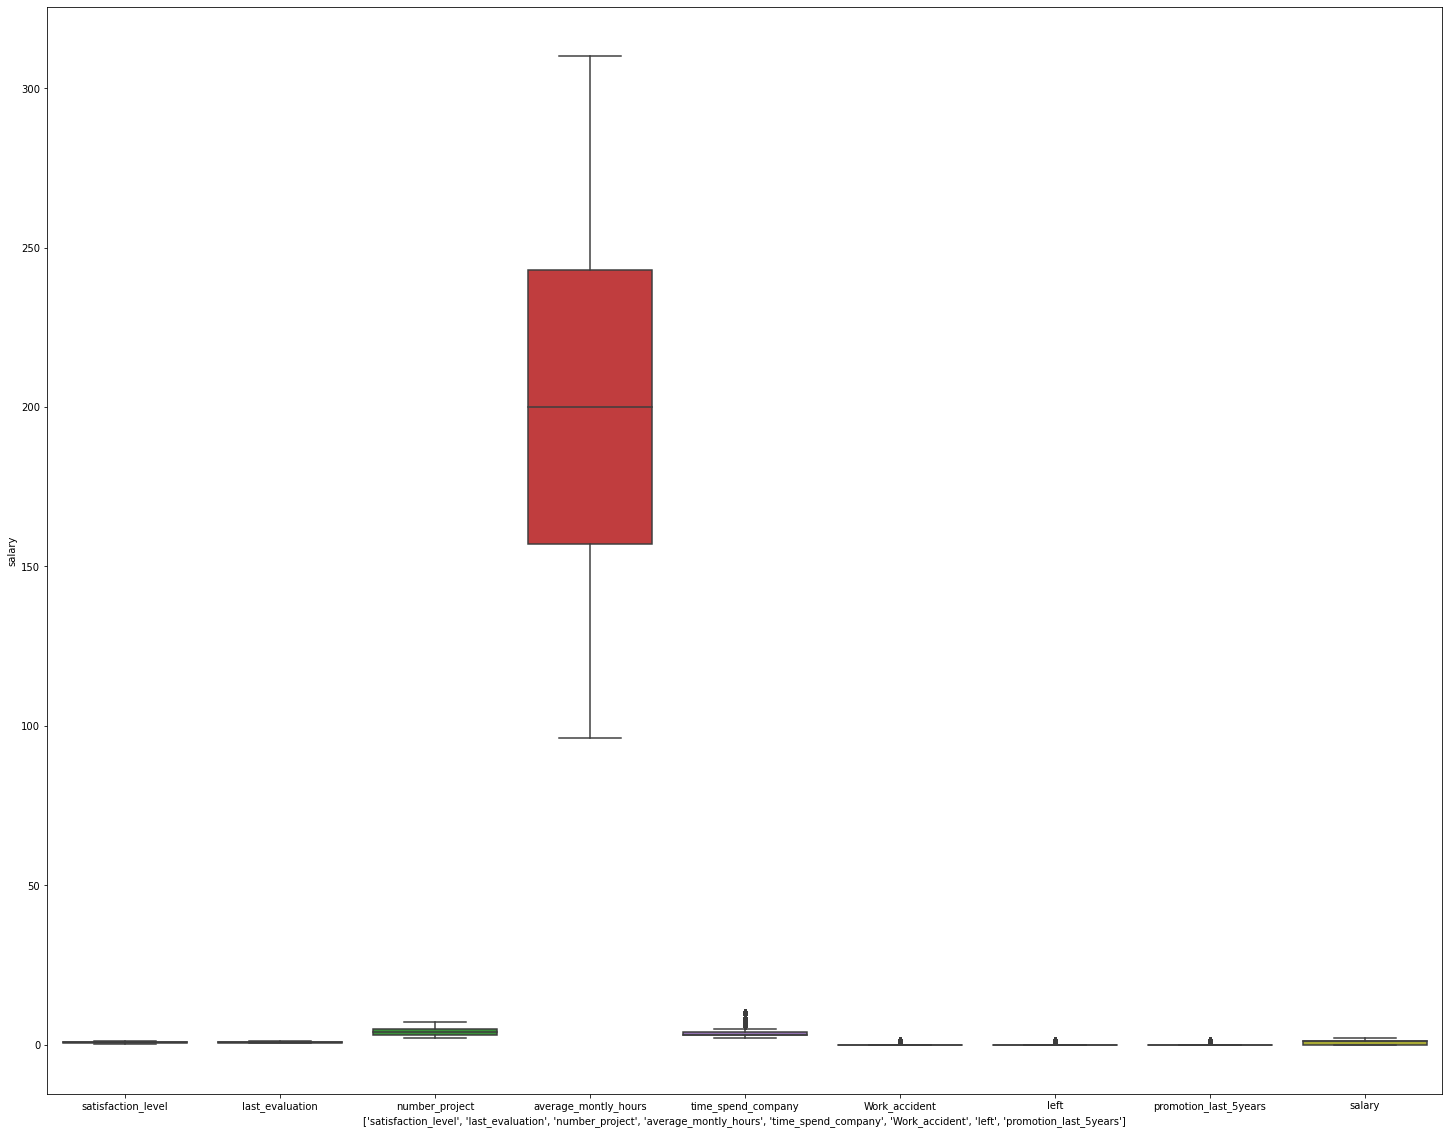

In [13]:
plt.figure(figsize=(25,20))
ax=sns.boxplot(data=df)
plt.ylabel('salary')
plt.xlabel(['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years'])
plt.show()

<Figure size 1800x1440 with 0 Axes>

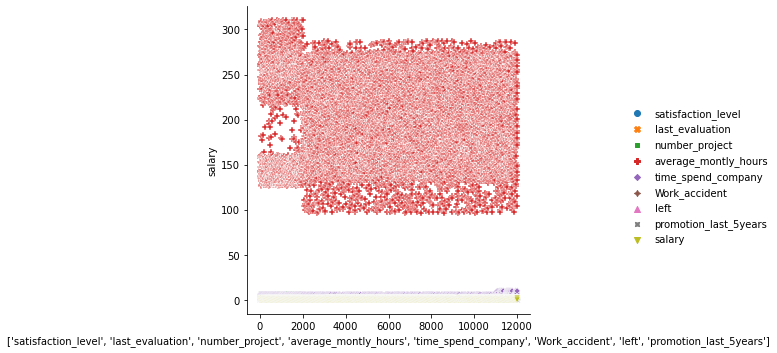

In [14]:
plt.figure(figsize=(25,20))
ax=sns.relplot(data=df)
plt.ylabel('salary')
plt.xlabel(['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years'])
plt.show()

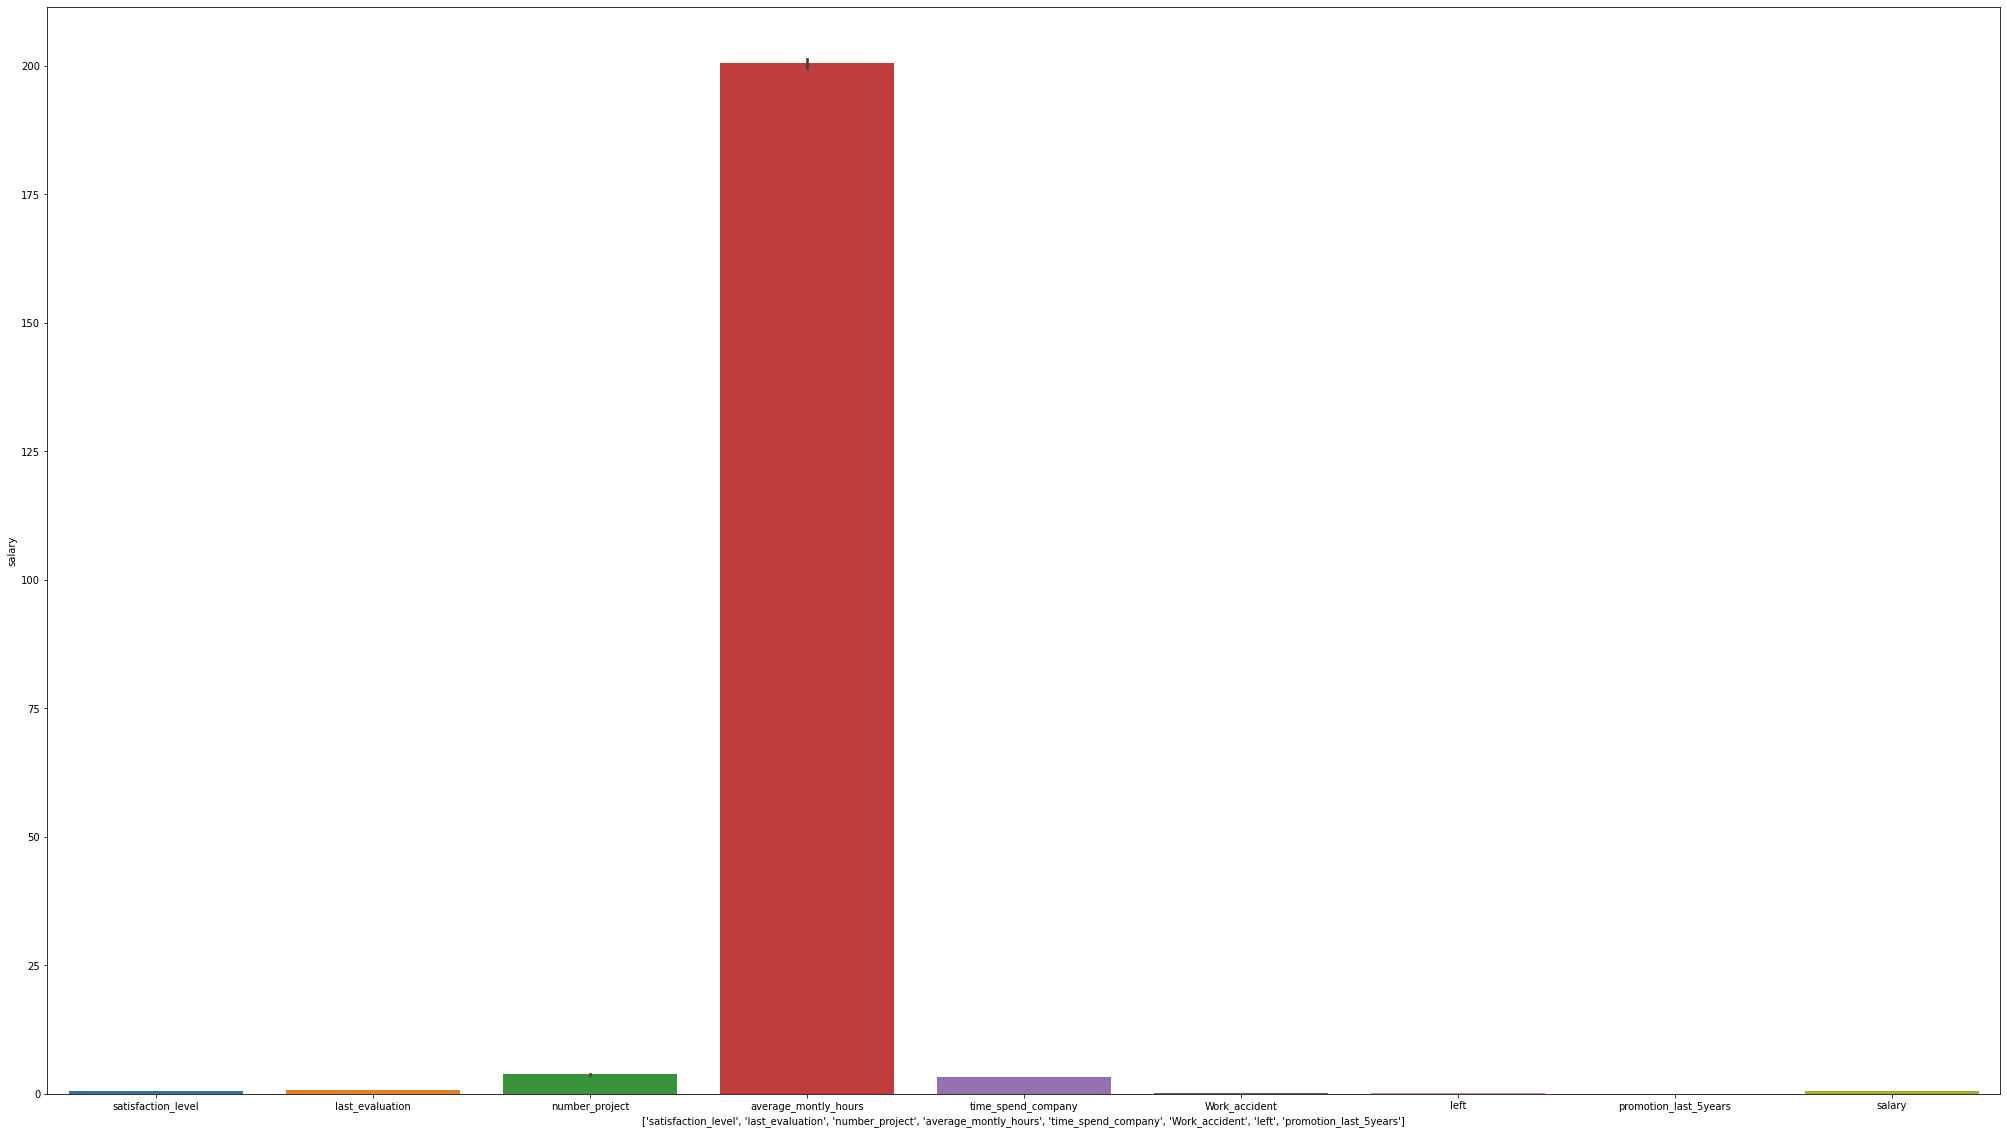

In [15]:
plt.figure(figsize=(35,20))
ax=sns.barplot(data=df)
plt.ylabel('salary')
plt.xlabel(['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years'])
plt.show()

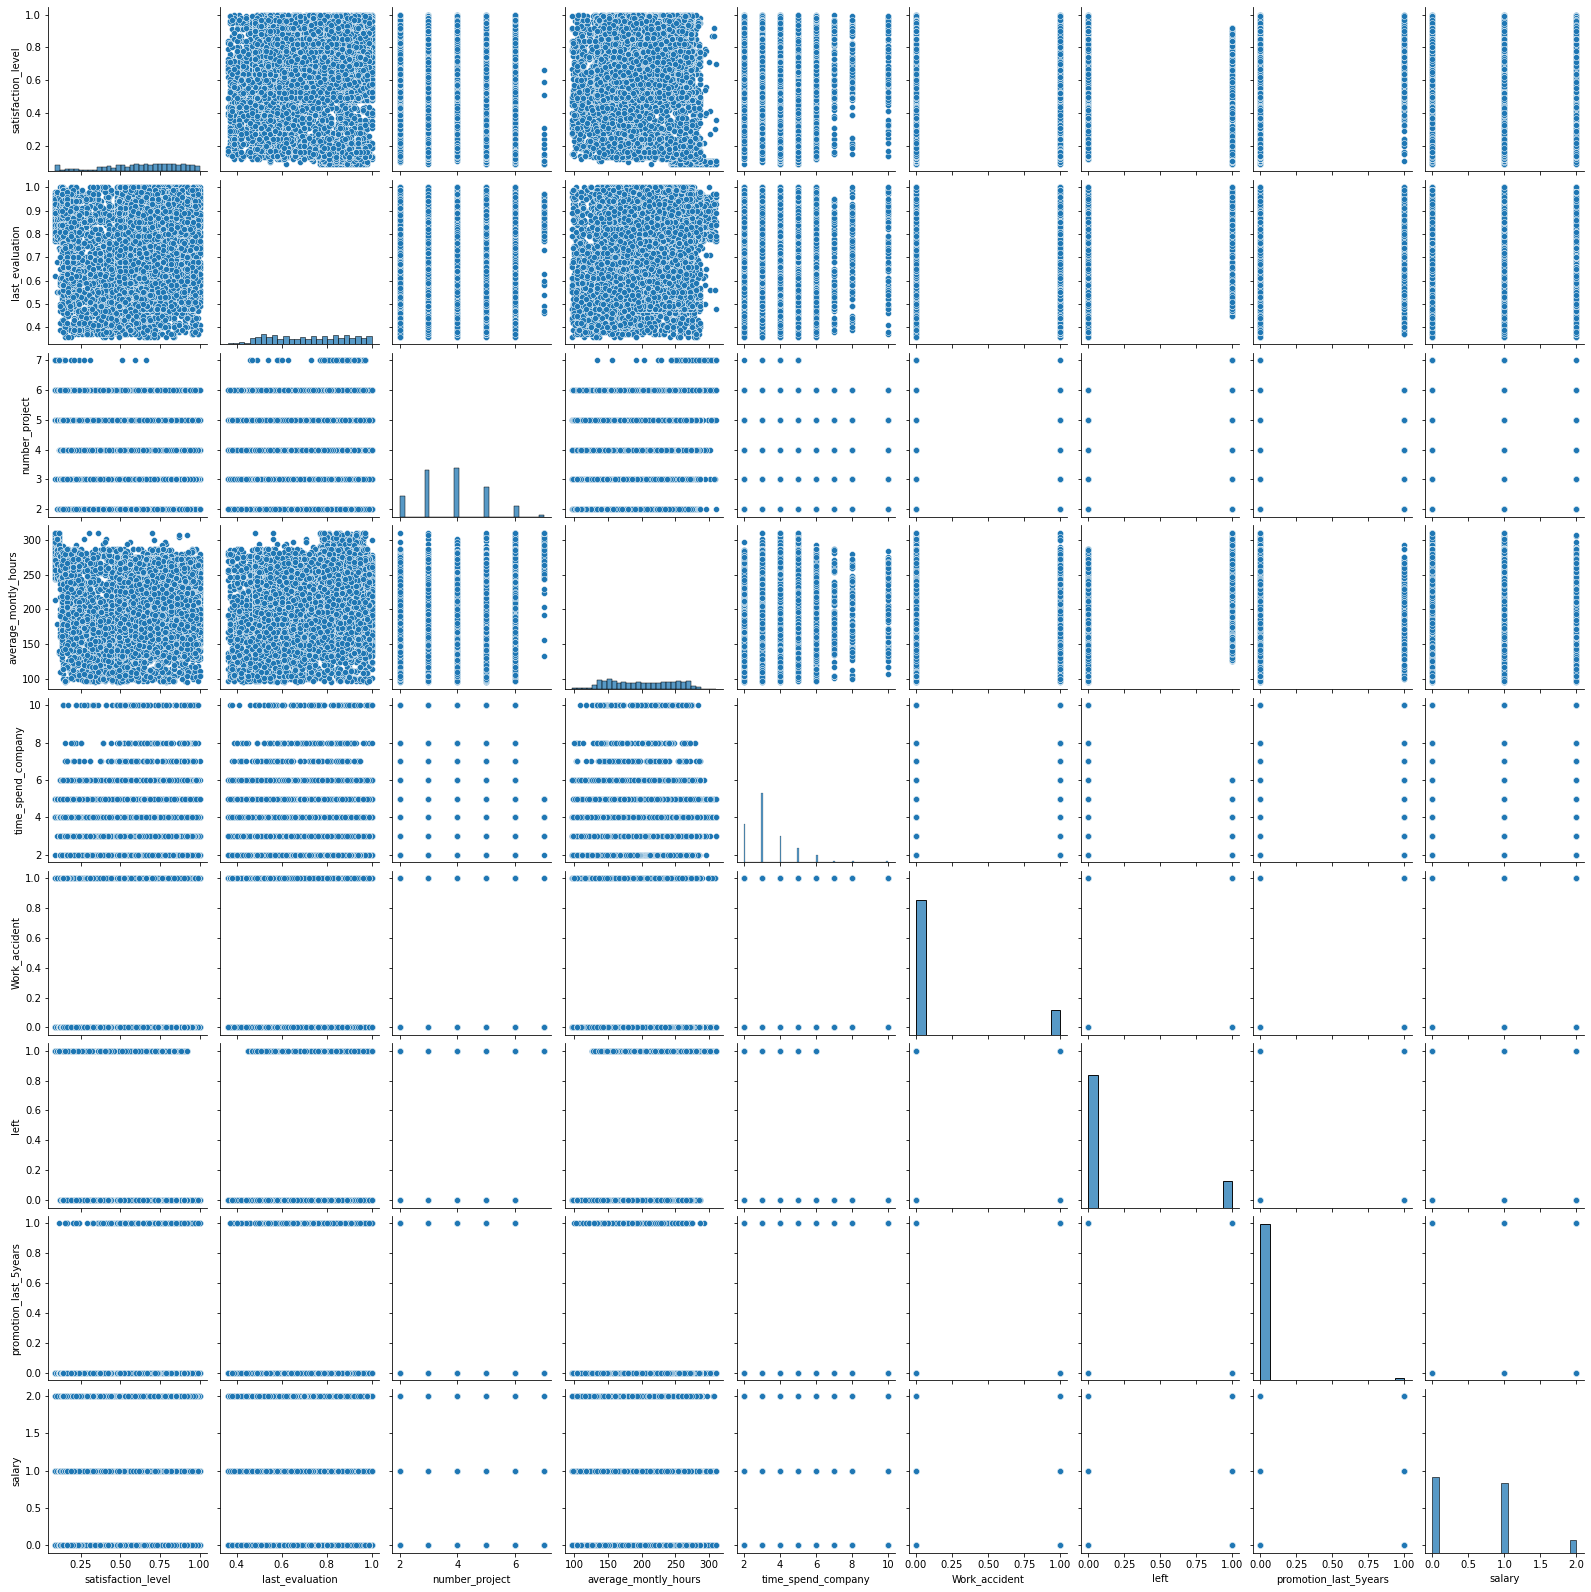

In [29]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

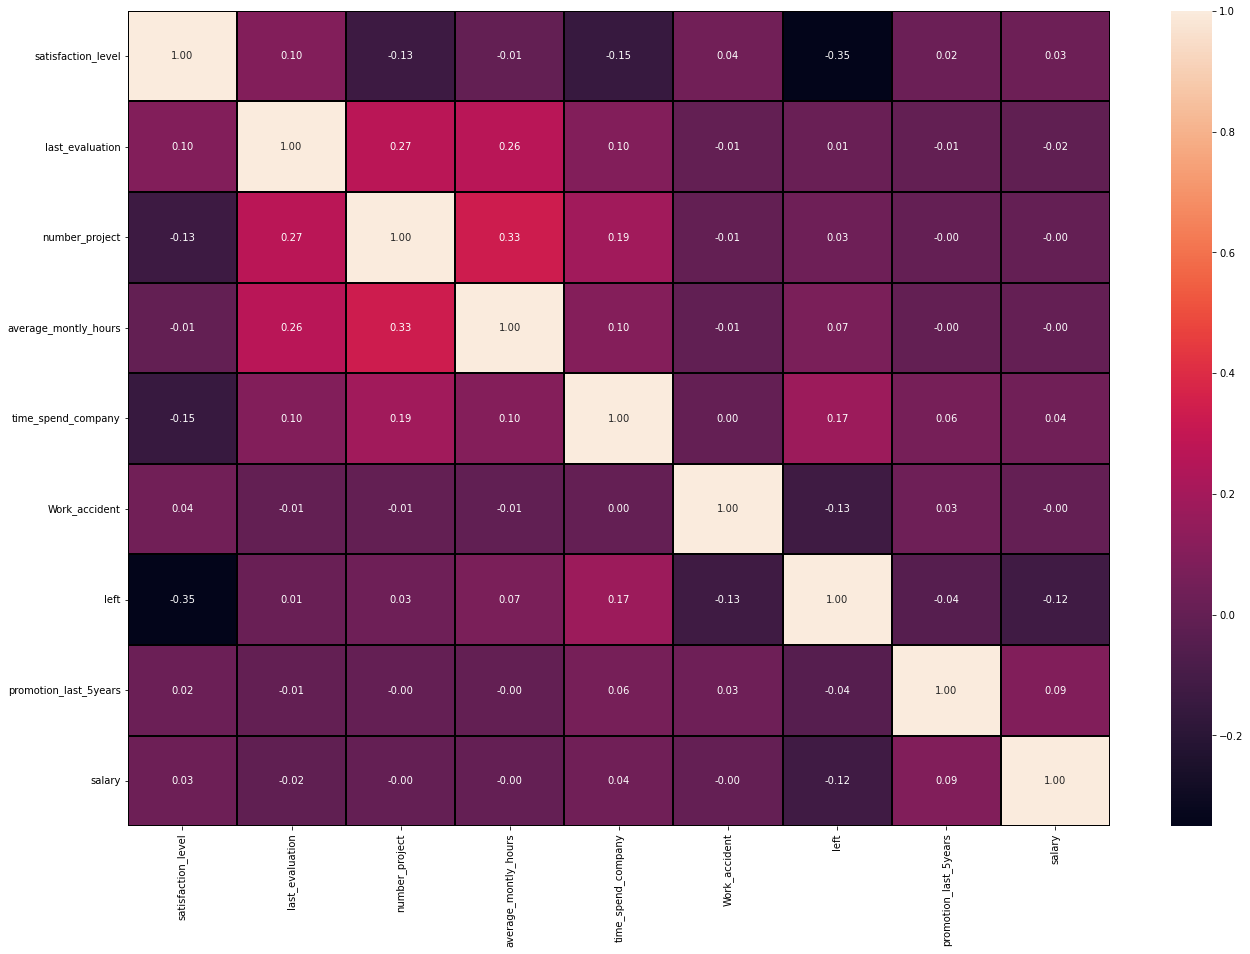

In [31]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

### Splitting data into features and labels

In [47]:
features=['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left','promotion_last_5years']
labels=['salary']
X=df[features]
y=df[labels]

### Scaling of data

In [48]:
scaler=PowerTransformer()
scaled=scaler.fit_transform(X)

In [49]:
scaled.shape

(11991, 8)

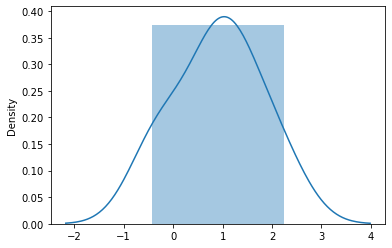

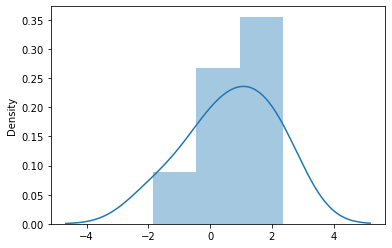

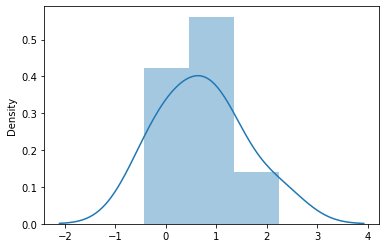

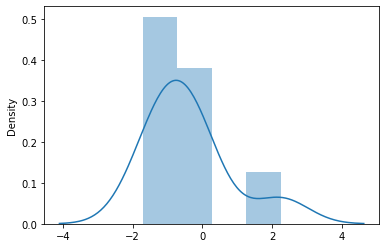

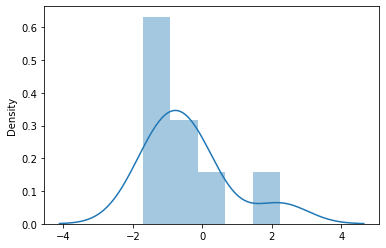

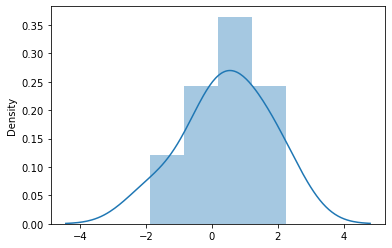

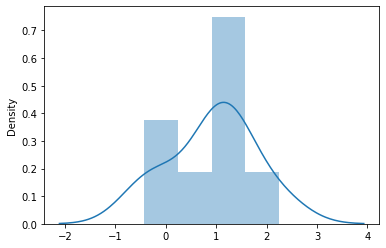

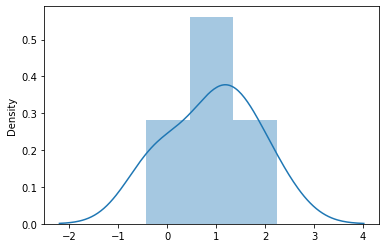

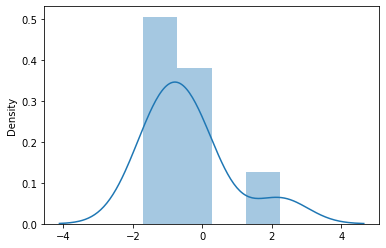

In [50]:
# visualize data after poer transform
x1=scaled
for i in range(1,10):
    sns.distplot(x1[i])
    plt.show()

As we saw in the graph, we removed skewness up to the mark, and the graph is shown more normalised than before.

<AxesSubplot:title={'center':'Correlation with target'}>

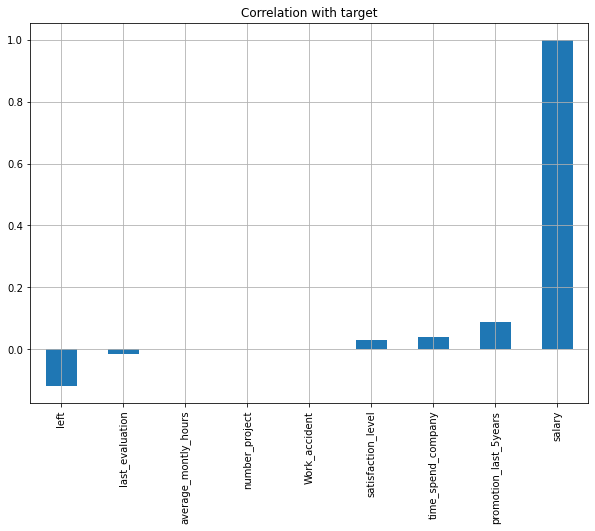

In [55]:
# In this grapgh reflected that which is more or less related with  salary.
df.corr()['salary'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')

In [56]:
# now we will scale it again by using Standard Scaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(X)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (Scaled, i) for i in range (Scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,1.197268,satisfaction_level
1,1.146015,last_evaluation
2,1.229548,number_project
3,1.174405,average_montly_hours
4,1.084820,time_spend_company
5,1.017103,Work_accident
6,1.189394,left
7,1.007249,promotion_last_5years


In [66]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [60]:
# we will do over sampling of data
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [61]:
# define dataset
X, y = make_classification(n_samples=200, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 161, 0: 39})
Counter({1: 161, 0: 161})


In [62]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

## Applying ML.

In [67]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 96.0
Training Accuracy 96.0
[[ 8  1]
 [ 1 40]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.98      0.98      0.98        41

    accuracy                           0.96        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.96      0.96      0.96        50



In [68]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_KNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 90.0
Training Accuracy 91.33333333333333
[[ 4  5]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.89      1.00      0.94        41

    accuracy                           0.90        50
   macro avg       0.95      0.72      0.78        50
weighted avg       0.91      0.90      0.88        50



In [69]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 92.0
Training Accuracy 100.0
[[ 8  1]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.97      0.93      0.95        41

    accuracy                           0.92        50
   macro avg       0.85      0.91      0.88        50
weighted avg       0.93      0.92      0.92        50



In [70]:
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_rdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 96.0
Training Accuracy 100.0
[[ 8  1]
 [ 1 40]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.98      0.98      0.98        41

    accuracy                           0.96        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.96      0.96      0.96        50



In [71]:
svr=SVC()
svr.fit(X_train,y_train)
pred_svr=svr.predict(X_test)
pred_train_svr=svr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_svr)*100)
print(confusion_matrix(y_test,pred_svr))
print(classification_report(y_test,pred_svr))

Test Accuracy 90.0
Training Accuracy 96.0
[[ 4  5]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.89      1.00      0.94        41

    accuracy                           0.90        50
   macro avg       0.95      0.72      0.78        50
weighted avg       0.91      0.90      0.88        50



### Checking Cross Validation Score

In [72]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 92.5


In [73]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 86.99999999999999


In [74]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 89.49999999999999


In [75]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 93.0


In [76]:
cr_5=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 92.5


We will move forward with Randomforest because it testing accuracy is high as comapre to other and we will do Hyperparameter tunning with it

### Hyperparamter Tunning

In [77]:
RandomForestClassifier()
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=200)

In [78]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

96.0

### roc_auc Curve

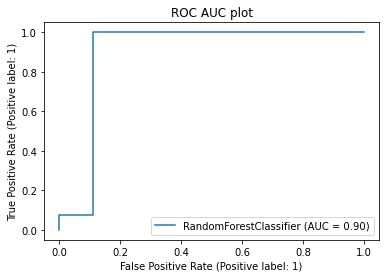

In [81]:
from sklearn.metrics import plot_roc_curve,auc,roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 

Finish